[1033.33333333]


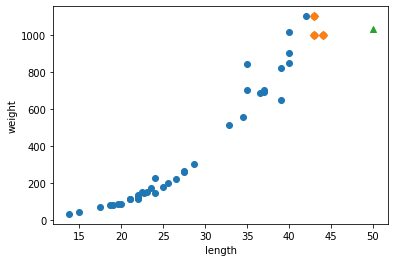

In [ ]:
import numpy as np

perch_length = np.array(
    [ 8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 35.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
)
perch_weight = np.array(
    [  5.9,  32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

# 훈련셋과 테스트셋으로 나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## k-최근접 이웃의 한계
위의 그래프를 보면, 농어의 길이가 8에서 44까지 있는 데이터를 가지고 훈련을 시켜 길이가 50인 농어의 무게를 예측하려고 하였다. 이때 산점도를 보면 길이가 50인 농어의 무게가 더 커야할 것 같음에도 불구하고 길이가 40에서 45인 농어의 무게와 비슷하게 나온다. 그럼 길이가 100인 농어의 무게를 다시 예측해보자

In [ ]:
print(knr.predict([[100]]))

[1033.33333333]


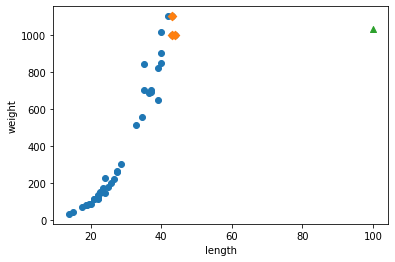

In [ ]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 100인 농어도 똑같이 1033g으로 예측한다. 이때 산점도를 보게되면 예측하려하는 데이터와 가까운 3개의 데이터가 같다는 점이다. 이로 미루어 보았을 때 길이가 45 이상인 모든 농어에 대해서는 같은 무게로 예측할 수 있는 오류가 있을 수 있다. 이 오류를 해결하려면 예측하려는 농어의 길이보다 더 긴 농어의 데이터가 필요한데, 이런 식이면 예측하려는 농어의 길이에 따라 수많은 데이터가 필요할 수 있으므로 비효율적이다. 이 문제를 선형 회귀 알고리즘으로 해결해보자

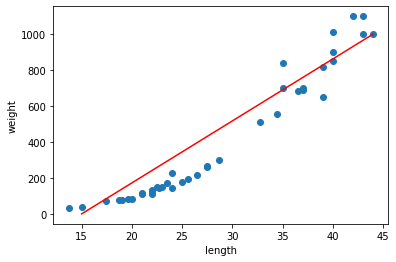

In [ ]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.plot([15, 44], [0, 1000],color="red")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 선형 회귀
**선형 회귀(linear regression)**는 특성이 하나인 경우 그 특성을 가장 잘 나타내는 직선을 학습하는 알고리즘이다

사이킷런은 sklearn.linear_model 패키지 아래 LinearRegression 클래스로 선형 회귀 알고리즘을 구현했다. 이 훈련에서는 
$$y = a \times x + b$$
위의 식에서 a와 b를 찾는 것이 목표인데, a는 클래스 객체의 coef_ 속성에, b는 클래스 객체의 intercept_ 속성에 저장되어있다

논외로 coef_와 intercept_는 **모델 파라미터(model parameter)**라고 하는데, 이 모델 파라미터를 찾는 학습을 **모델 기반 학습**이라고 하고, k-최근접 알고리즘과 같은 경우에는 데이터 자체가 훈련의 전부이므로 **사례 기반 학습**이라 한다.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1244.47645974]


In [ ]:
# coefficient(기울기)
print(lr.coef_, lr.intercept_)

[39.0963382] -710.3404501712598


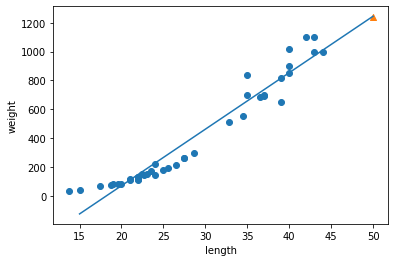

In [ ]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9394971834864317
0.8238994591357494


위의 결과를 언뜻 보면 테스트셋의 결과가 더 낮으므로 오버피팅으로 볼 수도 있지만, 두 결과 모두 부족하므로 언더피팅이라 봐야한다. 이러한 언더피팅이 난 이유를 분석해보면, 데이터의 분포가 직관적으로 지수적인데 우리는 이 지수적인 데이터를 직선으로 짓눌러 예측했기 때문에 이런 오차가 난 것이라 볼 수 있다. 또한 길이가 0에 가까운 농어 데이터의 무게를 예측하면 농어의 무게가 음수로 예측될 수도 있다

## 다항 회귀
이와 같은 문제를 해결하기 위해 이제는 데이터를 직선이 아닌 다항식에 맞춰보려 한다.
$$y = a \times x + b$$
가 아닌
$$y = a \times x^2 + b \times x + c$$
에서의 a, b, c를 찾아보자

여기서 x는 데이터의 길이이고, x^2 항이 있으므로 데이터의 길이를 제곱한 데이터가 필요하다. 이 데이터는 앞에서 사용했던 column_stack() 함수를 사용해 만들어보자

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))
print(lr.coef_, lr.intercept_)

[1570.60756779]
[  0.99445485 -20.28114795] 98.52783655534608


이름은 다항 회귀지만 훈련은 선형 회귀 알고리즘을 이용한다. 훈련을 시킬 때 훈련 데이터로는 행이 2개인 데이터를 넣지만, 우리의 예측 목적이 길이라는 점에서는 다름이 없기 때문에 타깃으로 train_target을 그대로 넣어준다. 그리고 predict 함수를 사용할 때는 길이를 제곱해준 데이터를 함께 넣어줘야 한다. 이 이유를 설명하기 전에 2차 다항식의 회귀를 선형 회귀라고 할 수 있는가에 대한 설명을 먼저 하겠다

우리가 구하고자 하는 다항식은
$$y = a \times x^2 + b \times x + c$$
와 같은데, 여기서 x^2를 z로 치환하게 되면
$$y = a \times z + b \times x + c$$
가 되고, 이렇게 되면 z와 x에 대한 일차 다항식이 되므로 선형 회귀로 돌릴 수 있다.
따라서 z에 대한 피예측값과 x에 대한 피예측값이 둘 다 들어가야하고, z는 사실 x^2 이므로 z에 대한 피예측값으로 길이의 제곱이 들어가는 것이다

이 훈련에서는 x^2의 계수를 0.99로 학습했고, x의 계수로 -20.28로 학습했다

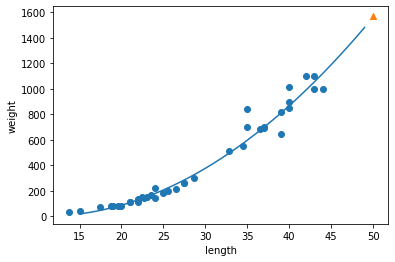

0.9693328488494828
0.9768544700915374


In [ ]:
# 2차 다항식을 그리는 방법: 구간을 1씩 끊어서 직선을 만들고,
# 그 직선을 이어 다항식처럼 보이게 한다

# 15에서 49까지 정수 배열을 만든다
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * (point ** 2) - 21.6 * point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1570, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))